<a href="https://colab.research.google.com/github/arimaz1881/ML-Exercises/blob/master/tf_neural_style_transfer_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [ ]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [ ]:
model

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject at 0x78ca39905870>

In [ ]:
def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

In [ ]:
content_image = load_image("content.png")
style_image = load_image("style.png")

In [ ]:
content_image

<tf.Tensor: shape=(1, 1080, 1920, 3), dtype=float32, numpy=
array([[[[0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.01176471],
         [0.01960784, 0.01568628, 0.02352941],
         ...,
         [0.08235294, 0.07843138, 0.13725491],
         [0.05882353, 0.05490196, 0.10588236],
         [0.05490196, 0.0509804 , 0.09411766]],

        [[0.00392157, 0.00392157, 0.00392157],
         [0.00784314, 0.00784314, 0.01176471],
         [0.01960784, 0.01568628, 0.02352941],
         ...,
         [0.07843138, 0.07058824, 0.12941177],
         [0.0627451 , 0.05882353, 0.10980393],
         [0.05490196, 0.0509804 , 0.09411766]],

        [[0.00392157, 0.00392157, 0.00392157],
         [0.00784314, 0.00784314, 0.01176471],
         [0.01960784, 0.01568628, 0.02352941],
         ...,
         [0.07843138, 0.07058824, 0.12941177],
         [0.0627451 , 0.05882353, 0.10980393],
         [0.05490196, 0.0509804 , 0.09411766]],

        ...,

        [[0.        , 0.00784314

In [ ]:
content_image.shape, style_image.shape

(TensorShape([1, 1080, 1920, 3]), TensorShape([1, 1080, 1920, 3]))

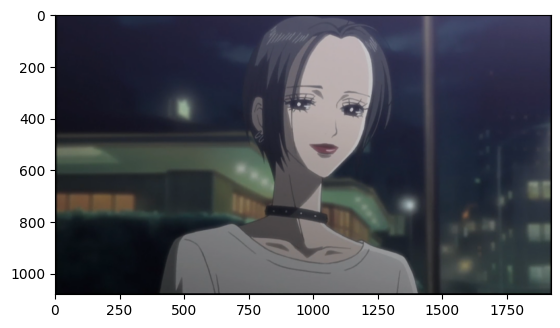

In [ ]:
plt.imshow(np.squeeze(content_image[:, :, :, :3]))
plt.show()

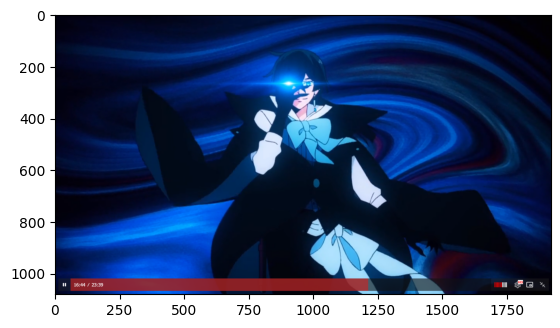

In [ ]:
plt.imshow(np.squeeze(style_image))
plt.show()

In [ ]:
stylized_image = model(tf.constant(content_image), tf.constant(style_image))

In [ ]:
stylized_image[0]

<tf.Tensor: shape=(1, 1080, 1920, 3), dtype=float32, numpy=
array([[[[0.29625526, 0.28281322, 0.49872422],
         [0.28487974, 0.27601248, 0.4675112 ],
         [0.31837454, 0.2954188 , 0.5079388 ],
         ...,
         [0.19013776, 0.27097142, 0.466796  ],
         [0.2149471 , 0.27854496, 0.5322904 ],
         [0.18638696, 0.24099581, 0.44221038]],

        [[0.29719627, 0.28486425, 0.5003716 ],
         [0.28535974, 0.27854905, 0.4688088 ],
         [0.31914872, 0.29810542, 0.5094641 ],
         ...,
         [0.20521821, 0.279412  , 0.4823037 ],
         [0.22649181, 0.28667432, 0.54300225],
         [0.20454994, 0.25263944, 0.46191657]],

        [[0.29859674, 0.28817573, 0.504385  ],
         [0.2858565 , 0.28137112, 0.47327852],
         [0.31915212, 0.30194506, 0.5148916 ],
         ...,
         [0.2158892 , 0.29681346, 0.49535495],
         [0.21537562, 0.289475  , 0.52985644],
         [0.20245962, 0.25836372, 0.45730844]],

        ...,

        [[0.435353  , 0.38296652

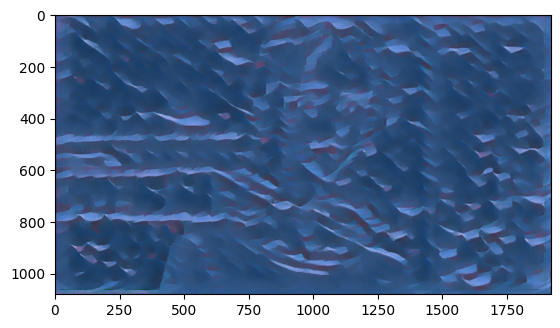

In [ ]:
plt.imshow(np.squeeze(stylized_image))
plt.show()